In [1]:
from pyquil.quil import Program
import pyquil.api as api
from pyquil.gates import *
qvm = api.QVMConnection()
from pyquil.api import get_qc

In [2]:
def h2_bk(x):
    #1
    prog=Program()
    prog+=X(0)
    prog+=H(0)
    prog+=RX(1.57,2)
    prog+=CNOT(0,1)
    prog+=CNOT(1,2)
    prog+=RZ(x[0],2)
    prog+=CNOT(1,2)
    prog+=CNOT(0,1)
    prog+=H(0)
    prog+=RX(-1.57,2)
    
    #2
    prog+=H(0)
    prog+=RX(1.57,2)
    prog+=CNOT(0,1)
    prog+=CNOT(1,2)
    prog+=CNOT(2,3)
    prog+=RZ(x[0],2)
    prog+=CNOT(2,3)
    prog+=CNOT(1,2)
    prog+=CNOT(0,1)
    prog+=H(0)
    prog+=RX(-1.57,2)
    
    #3
    prog+=H(0)
    prog+=RX(1.57,2)
    prog+=CNOT(0,2)
    prog+=RZ(x[0],2)
    prog+=CNOT(0,2)
    prog+=H(0)
    prog+=RX(-1.57,2)
    
    #4
    prog+=H(0)
    prog+=RX(1.57,2)
    prog+=CNOT(0,2)
    prog+=CNOT(2,3)
    prog+=RZ(x[0],3)
    prog+=CNOT(2,3)
    prog+=CNOT(0,2)
    prog+=H(0)
    prog+=RX(-1.57,2)
    
    #5
    prog+=RX(1.57,0)
    prog+=H(2)
    prog+=CNOT(0,1)
    prog+=CNOT(1,2)
    prog+=RZ(x[1],2)
    prog+=CNOT(1,2)
    prog+=CNOT(0,1)
    prog+=RX(-1.57,0)
    prog+=H(2)
    
    #6
    prog+=RX(1.57,0)
    prog+=H(2)
    prog+=CNOT(0,1)
    prog+=CNOT(1,2)
    prog+=CNOT(2,3)
    prog+=RZ(x[1],3)
    prog+=CNOT(2,3)
    prog+=CNOT(1,2)
    prog+=CNOT(0,1)
    prog+=RX(-1.57,0)
    prog+=H(2)
    
    
    #7
    prog+=RX(1.57,0)
    prog+=H(2)
    prog+=CNOT(0,2)
    prog+=RZ(x[1],2)
    prog+=CNOT(0,2)
    prog+=RX(-1.57,0)
    prog+=H(2)
    
    #8
    prog+=RX(1.57,0)
    prog+=H(2)
    prog+=CNOT(0,2)
    prog+=CNOT(2,3)
    prog+=RZ(x[1],3)
    prog+=CNOT(2,3)
    prog+=CNOT(0,2)
    prog+=RX(-1.57,0)
    prog+=H(2)
    
    return prog

In [3]:
import openfermionpyscf as ofpyscf
from openfermion.ops import QubitOperator
from forestopenfermion import pyquilpauli_to_qubitop, qubitop_to_pyquilpauli
z0 = QubitOperator('Z0')
z0z1 = QubitOperator('Z0 Z1')
z2=QubitOperator('Z2')
z1z2z3=QubitOperator('Z1 Z2 Z3')
z1=QubitOperator('Z1')
y0z1y2z3=QubitOperator('Y0 Z1 Y2 Z3')
x0z1x2=QubitOperator('X0 Z1 X2')
x0z1x2z3=QubitOperator('X0 Z1 X2 Z3')
y0z1y2=QubitOperator('Y0 Z1 Y2')
z0z2=QubitOperator('Z0 Z2')
z0z1z2z3=QubitOperator('Z0 Z1 Z2 Z3')
z0z1z2=QubitOperator('Z0 Z1 Z2')
z0z2z3=QubitOperator('Z0 Z2 Z3')
z1z3=QubitOperator('Z1 Z3')


z0_pauli = qubitop_to_pyquilpauli(z0)

z0z1_pauli = qubitop_to_pyquilpauli(z0z1)

z2_pauli=qubitop_to_pyquilpauli(z2)

z1z2z3_pauli=qubitop_to_pyquilpauli(z1z2z3)

z1_pauli=qubitop_to_pyquilpauli(z1)

y0z1y2z3_pauli=qubitop_to_pyquilpauli(y0z1y2z3)

x0z1x2_pauli=qubitop_to_pyquilpauli(x0z1x2)

x0z1x2z3_pauli=qubitop_to_pyquilpauli(x0z1x2z3)

y0z1y2_pauli=qubitop_to_pyquilpauli(y0z1y2)

z0z2_pauli=qubitop_to_pyquilpauli(z0z2)

z0z1z2z3_pauli=qubitop_to_pyquilpauli(z0z1z2z3)

z0z1z2_pauli=qubitop_to_pyquilpauli(z0z1z2)

z0z2z3_pauli=qubitop_to_pyquilpauli(z0z2z3)

z1z3_pauli=qubitop_to_pyquilpauli(z1z3)

In [4]:
from grove.pyvqe.vqe import VQE
from scipy.optimize import minimize
import numpy as np

vqe_inst = VQE(minimizer=minimize,minimizer_kwargs={'method': 'nelder-mead'})

In [5]:
import numpy as np

thetas1 = np.linspace(0,6,100)
thetas2 = np.linspace(0,6,100)

E_z0=[]
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E_z0.append(vqe_inst.expectation(h2_bk(param), z0_pauli, None, qvm))

In [6]:
E=np.array(E_z0).reshape(100,100)
E_z0=E.transpose()

In [7]:
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

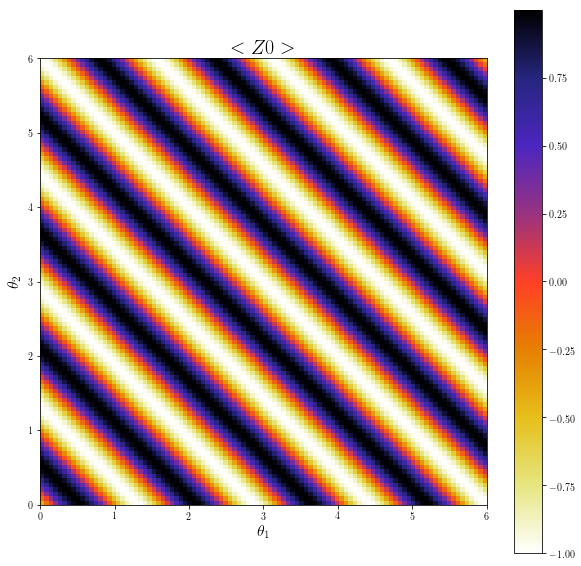

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(E_z0,cmap='CMRmap_r',extent=[0,6,0,6])
plt.colorbar()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)
plt.title(r'$<Z0>$',fontsize=20)
plt.savefig('Z0_bk_full',format='png')

In [9]:
thetas1 = np.linspace(0,6,100)
thetas2 = np.linspace(0,6,100)
import numpy as np
E_z1=[]
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E_z1.append(vqe_inst.expectation(h2_bk(param), z1_pauli, None, qvm))

In [10]:
E=np.array(E_z1).reshape(100,100)
E_z1=E.transpose()

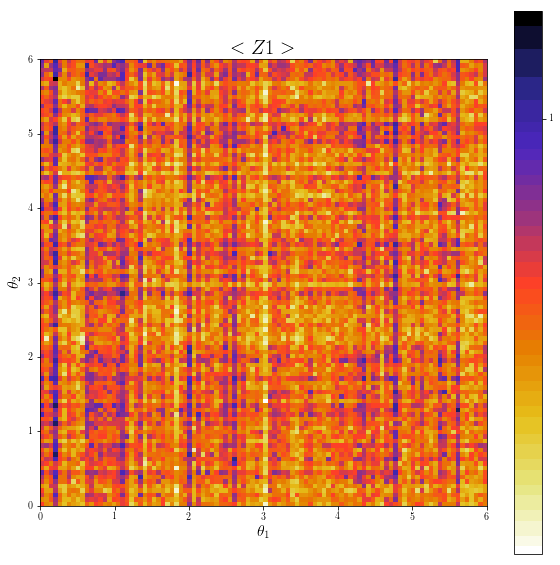

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(E_z1,cmap='CMRmap_r',extent=[0,6,0,6])
plt.colorbar()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)
plt.title(r'$< Z1>$',fontsize=20)
plt.savefig('Z1_bk_full',format='png')

In [12]:
thetas1 = np.linspace(0,6,100)
thetas2 = np.linspace(0,6,100)
import numpy as np
E_z2=[]
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E_z2.append(vqe_inst.expectation(h2_bk(param), z2_pauli, None, qvm))

In [13]:
E=np.array(E_z2).reshape(100,100)
E_z2=E.transpose()

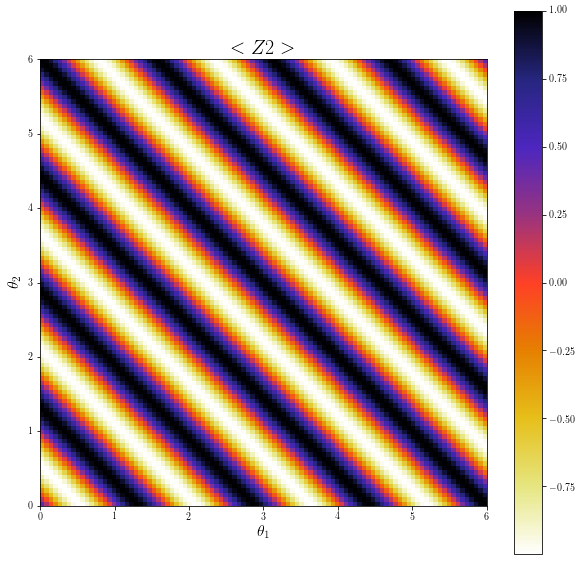

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(E_z2,cmap='CMRmap_r',extent=[0,6,0,6])
plt.colorbar()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)
plt.title(r'$<Z2>$',fontsize=20)
plt.savefig('Z2_bk_full',format='png')

In [15]:
thetas1 = np.linspace(0,6,100)
thetas2 = np.linspace(0,6,100)
import numpy as np
E_z0z1=[]
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E_z0z1.append(vqe_inst.expectation(h2_bk(param), z0z1_pauli, None, qvm))

In [16]:
E=np.array(E_z0z1).reshape(100,100)
E_z0z1=E.transpose()

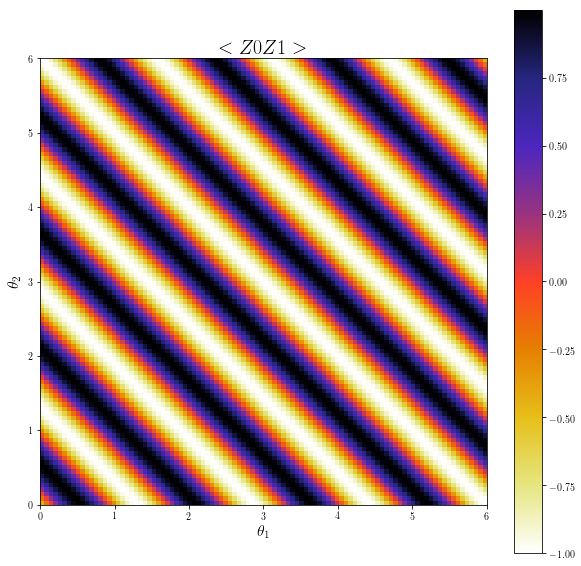

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(E_z0z1,cmap='CMRmap_r',extent=[0,6,0,6])
plt.colorbar()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)
plt.title(r'$<Z0 Z1>$',fontsize=20)
plt.savefig('Z0Z1_bk_full',format='png')

In [18]:
thetas1 = np.linspace(0,6,100)
thetas2 = np.linspace(0,6,100)
import numpy as np
E_z0z2=[]
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E_z0z2.append(vqe_inst.expectation(h2_bk(param), z0z2_pauli, None, qvm))

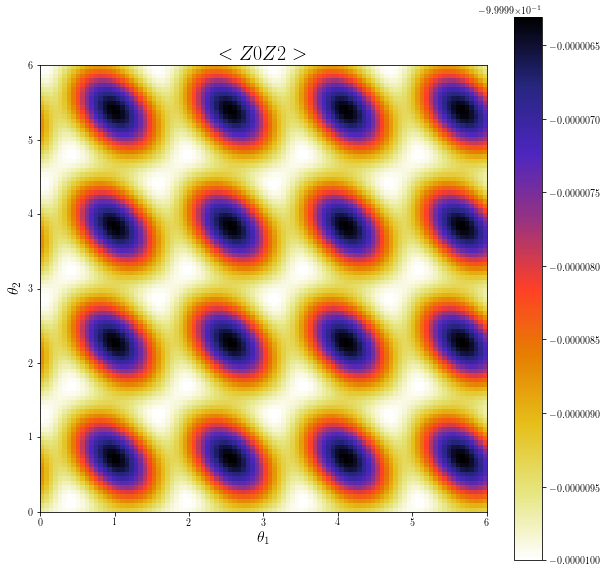

In [19]:
E=np.array(E_z0z2).reshape(100,100)
E_z0z2=E.transpose()
plt.figure(figsize=(10,10))
plt.imshow(E_z0z2,cmap='CMRmap_r',extent=[0,6,0,6])
plt.colorbar()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)
plt.title(r'$<Z0 Z2>$',fontsize=20)
plt.savefig('Z0Z2_bk_full',format='png')

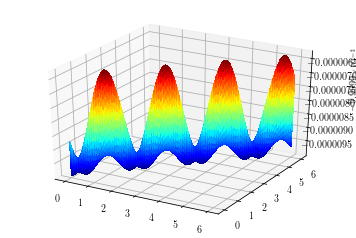

In [49]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(thetas1, thetas2, E_z0z2, rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

In [20]:
thetas1 = np.linspace(0,6,100)
thetas2 = np.linspace(0,6,100)
import numpy as np
E_z1z3=[]
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E_z1z3.append(vqe_inst.expectation(h2_bk(param), z1z3_pauli, None, qvm))

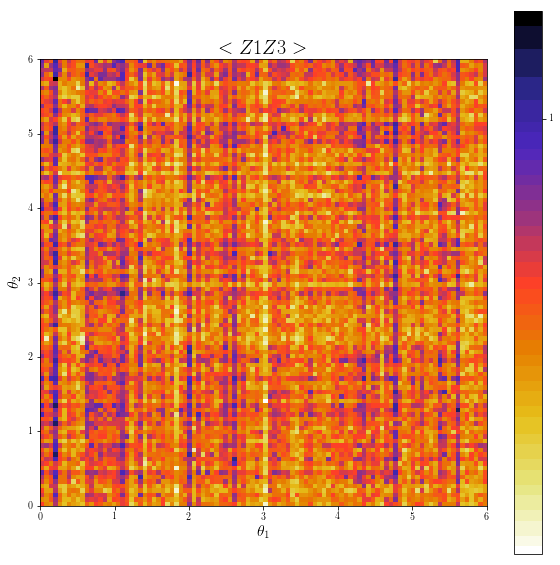

In [21]:
E=np.array(E_z1z3).reshape(100,100)
E_z1z3=E.transpose()
plt.figure(figsize=(10,10))
plt.imshow(E_z1z3,cmap='CMRmap_r',extent=[0,6,0,6])
plt.colorbar()
plt.clim()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)
plt.title(r'$<Z1 Z3>$',fontsize=20)
plt.savefig('Z1Z3_bk_full',format='png')

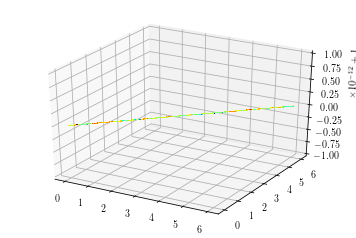

In [50]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(thetas1, thetas2, E_z1z3, rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

In [22]:
thetas1 = np.linspace(0,6,100)
thetas2 = np.linspace(0,6,100)
import numpy as np
E_z0z1z2=[]
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E_z0z1z2.append(vqe_inst.expectation(h2_bk(param), z0z1z2_pauli, None, qvm))

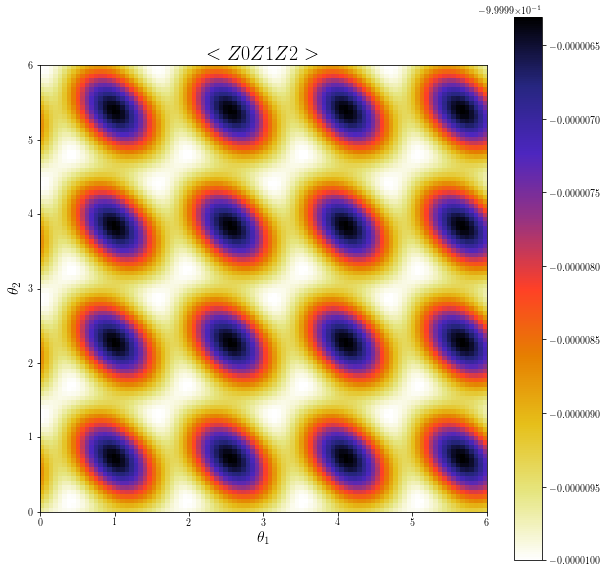

In [23]:
E=np.array(E_z0z1z2).reshape(100,100)
E_z0z1z2=E.transpose()
plt.figure(figsize=(10,10))
plt.imshow(E_z0z1z2,cmap='CMRmap_r',extent=[0,6,0,6])
plt.colorbar()
plt.clim()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)
plt.title(r'$<Z0 Z1 Z2>$',fontsize=20)
plt.savefig('Z0Z1Z2_bk_full',format='png')

In [24]:
thetas1 = np.linspace(0,6,100)
thetas2 = np.linspace(0,6,100)
import numpy as np
E_z0z2z3=[]
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E_z0z2z3.append(vqe_inst.expectation(h2_bk(param), z0z2z3_pauli, None, qvm))

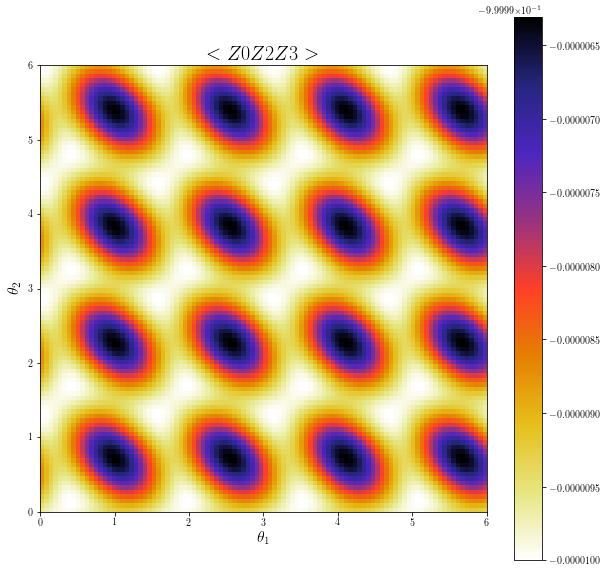

In [25]:
E=np.array(E_z0z2z3).reshape(100,100)
E_z0z2z3=E.transpose()
plt.figure(figsize=(10,10))
plt.imshow(E_z0z2z3,cmap='CMRmap_r',extent=[0,6,0,6])
plt.colorbar()
plt.clim()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)
plt.title(r'$<Z0 Z2 Z3>$',fontsize=20)
plt.savefig('Z0Z2Z3_bk_full',format='png')

In [26]:
thetas1 = np.linspace(0,6,100)
thetas2 = np.linspace(0,6,100)
import numpy as np
E_z1z2z3=[]
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E_z1z2z3.append(vqe_inst.expectation(h2_bk(param), z1z2z3_pauli, None, qvm))

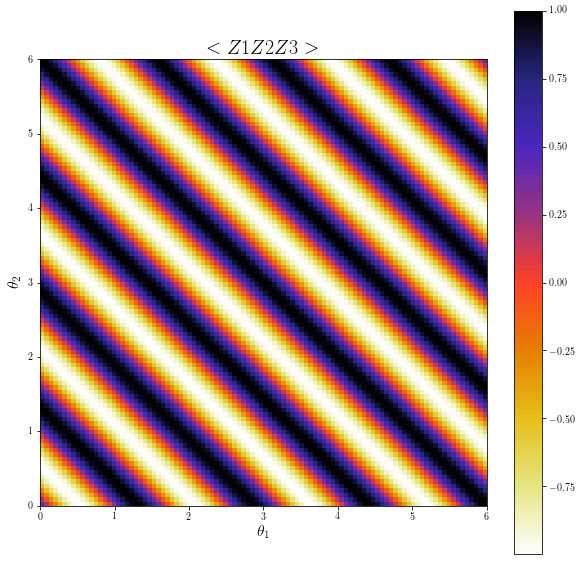

In [27]:
E=np.array(E_z1z2z3).reshape(100,100)
E_z1z2z3=E.transpose()
plt.figure(figsize=(10,10))
plt.imshow(E_z1z2z3,cmap='CMRmap_r',extent=[0,6,0,6])
plt.colorbar()
plt.clim()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)
plt.title(r'$<Z1 Z2 Z3>$',fontsize=20)
plt.savefig('Z1Z2Z3_bk_full',format='png')

In [28]:
import numpy as np
E_z0z1z2z3=[]
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E_z0z1z2z3.append(vqe_inst.expectation(h2_bk(param), z0z1z2z3_pauli, None, qvm))

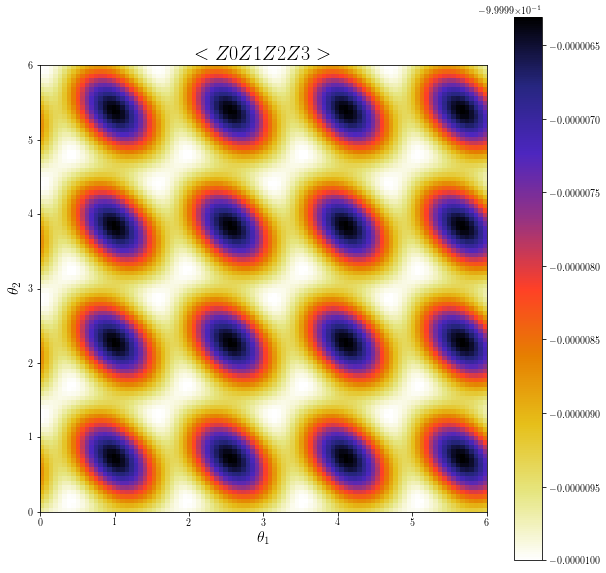

In [29]:
E=np.array(E_z0z1z2z3).reshape(100,100)
E_z0z1z2z3=E.transpose()
plt.figure(figsize=(10,10))
plt.imshow(E_z0z1z2z3,cmap='CMRmap_r',extent=[0,6,0,6])
plt.colorbar()
plt.clim()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)
plt.title(r'$< Z0 Z1 Z2 Z3>$',fontsize=20)
plt.savefig('Z0Z1Z2Z3_bk_full',format='png')

In [30]:
import numpy as np
E_y0z1y2=[]
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E_y0z1y2.append(vqe_inst.expectation(h2_bk(param), y0z1y2_pauli, None, qvm))

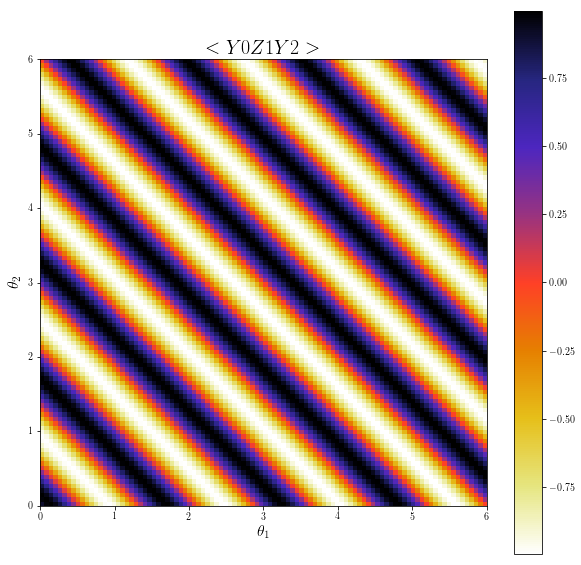

In [31]:
E=np.array(E_y0z1y2).reshape(100,100)
E_y0z1y2=E.transpose()
plt.figure(figsize=(10,10))
plt.imshow(E_y0z1y2,cmap='CMRmap_r',extent=[0,6,0,6])
plt.colorbar()
plt.clim()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)
plt.title(r'$< Y0 Z1 Y2 >$',fontsize=20)
plt.savefig('Y0Z1Y2_bk_full',format='png')

In [32]:
import numpy as np
E_y0z1y2z3=[]
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E_y0z1y2z3.append(vqe_inst.expectation(h2_bk(param), y0z1y2z3_pauli, None, qvm))

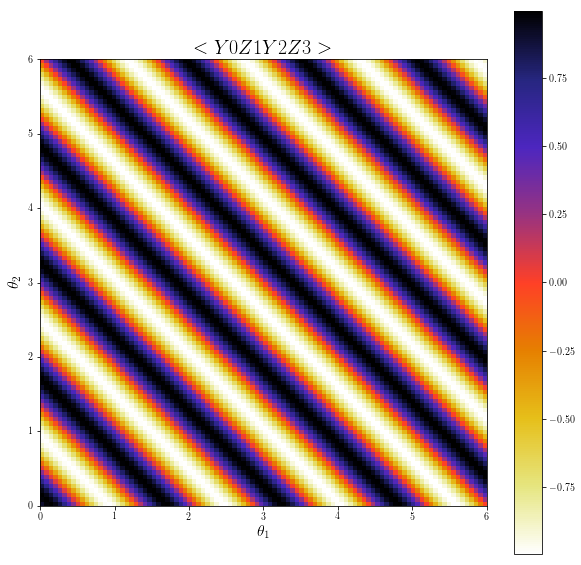

In [33]:
E=np.array(E_y0z1y2z3).reshape(100,100)
E_y0z1y2z3=E.transpose()
plt.figure(figsize=(10,10))
plt.imshow(E_y0z1y2z3,cmap='CMRmap_r',extent=[0,6,0,6])
plt.colorbar()
plt.clim()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)
plt.title(r'$< Y0 Z1 Y2 Z3 >$',fontsize=20)
plt.savefig('Y0Z1Y2Z3_bk_full',format='png')

In [72]:
print(E_z0)

[[-1.         -0.97075887 -0.88474558 ...  0.04677631 -0.1943854
  -0.42417901]
 [-0.97075889 -0.99999998 -0.97075881 ...  0.28520227  0.04677614
  -0.19438556]
 [-0.88474565 -0.97075885 -0.99999989 ...  0.50694891  0.28520206
   0.04677595]
 ...
 [ 0.04677565  0.2852018   0.5069487  ... -1.         -0.97075903
  -0.88474589]
 [-0.19438591  0.04677579  0.28520193 ... -0.97075874 -0.99999999
  -0.97075899]
 [-0.42417937 -0.1943858   0.04677589 ... -0.88474535 -0.97075874
  -0.99999997]]


[[ 0.00000000e+00  2.40056608e-01  4.66074165e-01 ... -9.98905073e-01
  -9.80924925e-01 -9.05578075e-01]
 [-2.40056608e-01 -5.42213691e-10  2.40056597e-01 ... -9.58467196e-01
  -9.98905228e-01 -9.80925040e-01]
 [-4.66074165e-01 -2.40056601e-01 -8.42359547e-09 ... -8.61976073e-01
  -9.58467368e-01 -9.98905351e-01]
 ...
 [ 9.98905073e-01  9.58467157e-01  8.61975920e-01 ... -6.94848403e-07
   2.40055933e-01  4.66073546e-01]
 [ 9.80924925e-01  9.98905198e-01  9.58467250e-01 ... -2.40057002e-01
  -4.11563595e-07  2.40056210e-01]
 [ 9.05578075e-01  9.80925018e-01  9.98905267e-01 ... -4.66074311e-01
  -2.40056798e-01 -2.10260300e-07]]


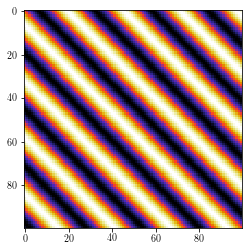

In [75]:
print(E_y0z1y2z3)
plt.imshow(E_y0z1y2z3,cmap='CMRmap_r',extent=[0,6,0,6])

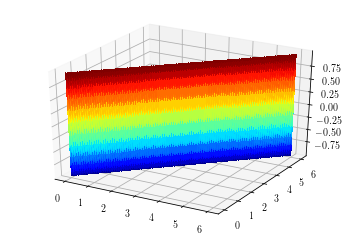

In [76]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(thetas1, thetas2, E_z0, rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

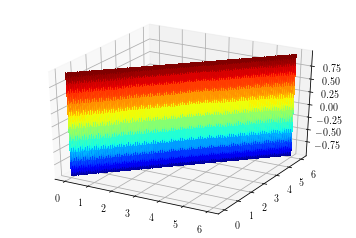

In [77]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(thetas1, thetas2, E_y0z1y2z3, rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

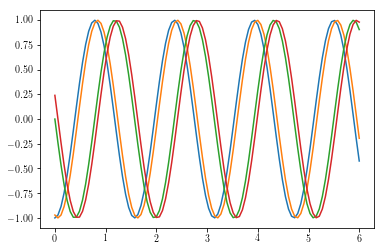

In [82]:
plt.plot(thetas1,E_z0[:,0])
plt.plot(thetas1,E_z0[:,1])
plt.plot(thetas1,E_y0z1y2z3[:,0])
plt.plot(thetas1,E_y0z1y2z3[:,1])

In [34]:
import numpy as np
E_x0z1x2=[]
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E_x0z1x2.append(vqe_inst.expectation(h2_bk(param), x0z1x2_pauli, None, qvm))

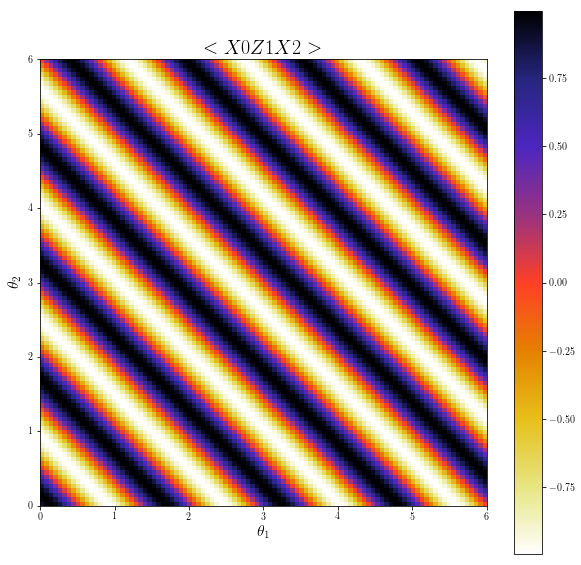

In [35]:
E=np.array(E_x0z1x2).reshape(100,100)
E_x0z1x2=E.transpose()
plt.figure(figsize=(10,10))
plt.imshow(E_x0z1x2,cmap='CMRmap_r',extent=[0,6,0,6])
plt.colorbar()
plt.clim()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)
plt.title(r'$< X0 Z1 X2  >$',fontsize=20)
plt.savefig('X0Z1X2_bk_full',format='png')

In [36]:
import numpy as np
E_x0z1x2z3=[]
for x in thetas1:
    for y in thetas2:
        param=[x,y]
        E_x0z1x2z3.append(vqe_inst.expectation(h2_bk(param), x0z1x2z3_pauli, None, qvm))

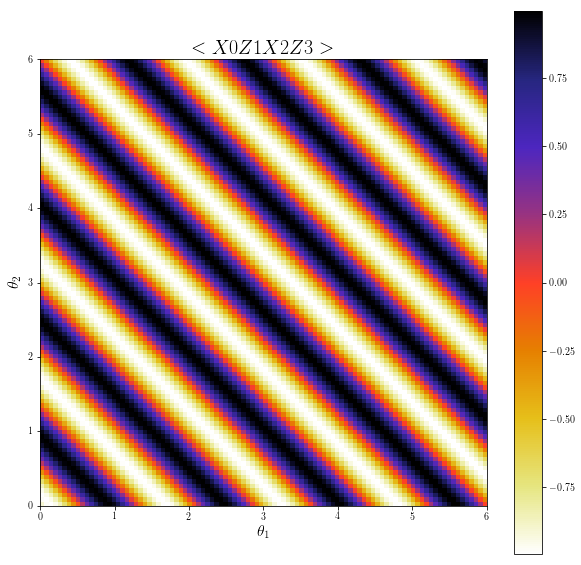

In [38]:
E=np.array(E_x0z1x2z3).reshape(100,100)
E_x0z1x2z3=E.transpose()
plt.figure(figsize=(10,10))
plt.imshow(E_x0z1x2z3,cmap='CMRmap_r',extent=[0,6,0,6])
plt.colorbar()
plt.clim()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)
plt.title(r'$< X0 Z1 X2 Z3 >$',fontsize=20)
plt.savefig('X0Z1X2Z3_bk_full',format='png')